# UNIs

Jack Shi (js5157), Jin Woo Won (jw3580), Udai Nagpal (ugn2000)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [80]:
# Classifiers
import MLE_classifier as mle
import Naive_Bayes_classifier as nb
import KNN_classifier as knn

In [2]:
train = pd.read_csv('hw1data/propublicaTrain.csv')
test = pd.read_csv('hw1data/propublicaTest.csv')

In [84]:
mle_accuracy, mle_df = mle.perform_mle(train, test)

In [85]:
nb_accuracy, nb_df = nb.perform_naive_bayes(train, test)

In [86]:
knn_accuracy, knn_df = knn.perform_knn(train, test)

In [87]:
knn_accuracy

0.6645

In [88]:
knn_df.head()

,two_year_recid,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree_F,c_charge_degree_M,prediction
0,1,1,27,1,0,0,1,18,1,0,1.0
1,1,0,29,1,0,0,0,11,1,0,1.0
2,1,1,25,1,0,0,1,6,0,1,1.0
3,0,1,26,1,1,0,0,2,1,0,1.0
4,0,0,33,1,0,0,0,2,1,0,0.0


In [66]:
LABEL = 'two_year_recid'
RACE = 'race'
PRED = 'prediction'

# Demographic Parity

In [67]:
def find_diff(P1, P2):
    '''Return absolute difference in percentage'''
    return abs(P1 - P2) * 100

def find_DP_pr(classifier_df, pred, race):
    numerator = classifier_df.loc[(classifier_df[PRED] == pred) & (classifier_df[RACE] == race)].shape[0]
    denominator = classifier_df.loc[classifier_df[RACE] == race].shape[0]
    return numerator / denominator

### MLE

In [93]:
# P[prediction=1 | race=1]
P_11 = find_DP_pr(mle_df, pred=1, race=1)

# P[prediction=1 | race=0]
P_10 = find_DP_pr(mle_df, pred=1, race=0)

DP_mle_diff = find_diff(P_11, P_10)

In [94]:
DP_mle_diff

9.522220619002958

### K-Nearest Neighbors

In [95]:
DP_knn_diff = find_diff(find_DP_pr(knn_df, pred=1, race=1),\
                        find_DP_pr(knn_df, pred=1, race=0))

In [96]:
DP_knn_diff

17.644830820287133

### Naive Bayes

In [97]:
DP_nb_diff = find_diff(find_DP_pr(nb_df, pred=1, race=1),\
                       find_DP_pr(nb_df, pred=1, race=0))

In [98]:
DP_nb_diff

26.8324796190751

In [132]:
def plot_diff(differences):
    x = np.arange(3)
    plt.bar(x, differences, color=['r', 'g', 'b'])
    plt.xticks(x, ('MLE', 'K-NN', 'Naive Bayes'))
    plt.ylabel('Absolute differences (%)')
    plt.show()

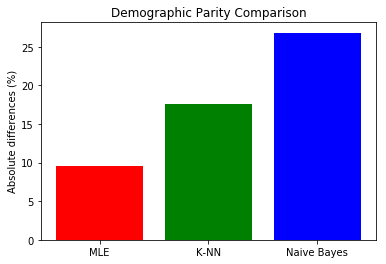

In [140]:
plt.title('Demographic Parity Comparison')
plot_diff([DP_mle_diff, DP_knn_diff, DP_nb_diff])

# Equalized Odds

In [112]:
def find_EO_pr(classifier_df, pred, race, label):
    numerator = classifier_df.loc[(classifier_df[PRED] == pred) &\
                                 (classifier_df[RACE] == race) &\
                                 (classifier_df[LABEL] == label)].shape[0]
    denominator = classifier_df.loc[(classifier_df[RACE] == race) &\
                                   (classifier_df[LABEL] == label)].shape[0]
    return numerator / denominator

### MLE

In [124]:
# Note 1, 3 and 2, 4 are the same
EO_mle_diff1 = find_diff(find_EO_pr(mle_df, pred=1, race=1, label=1),\
                         find_EO_pr(mle_df, pred=1, race=0, label=1))
EO_mle_diff2 = find_diff(find_EO_pr(mle_df, pred=1, race=1, label=0),\
                         find_EO_pr(mle_df, pred=1, race=0, label=0))
EO_mle_diff3 = find_diff(find_EO_pr(mle_df, pred=0, race=1, label=1),\
                         find_EO_pr(mle_df, pred=0, race=0, label=1))
EO_mle_diff4 = find_diff(find_EO_pr(mle_df, pred=0, race=1, label=0),\
                         find_EO_pr(mle_df, pred=0, race=0, label=0))

In [125]:
EO_mle_diff1, EO_mle_diff2, EO_mle_diff3, EO_mle_diff4

(13.165176670923797, 3.673033643026142, 13.165176670923806, 3.6730336430261468)

### K-Nearest Neighbors

In [127]:
EO_knn_diff1 = find_diff(find_EO_pr(knn_df, pred=1, race=1, label=1),\
                         find_EO_pr(knn_df, pred=1, race=0, label=1))
EO_knn_diff2 = find_diff(find_EO_pr(knn_df, pred=1, race=1, label=0),\
                         find_EO_pr(knn_df, pred=1, race=0, label=0))

### Naive Bayes

In [129]:
EO_nb_diff1 = find_diff(find_EO_pr(nb_df, pred=1, race=1, label=1),\
                         find_EO_pr(nb_df, pred=1, race=0, label=1))
EO_nb_diff2 = find_diff(find_EO_pr(nb_df, pred=1, race=1, label=0),\
                         find_EO_pr(nb_df, pred=1, race=0, label=0))

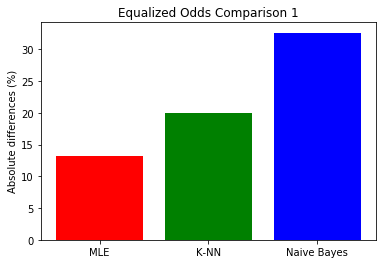

In [138]:
plt.title('Equalized Odds Comparison 1')
plot_diff([EO_mle_diff1, EO_knn_diff1, EO_nb_diff1])

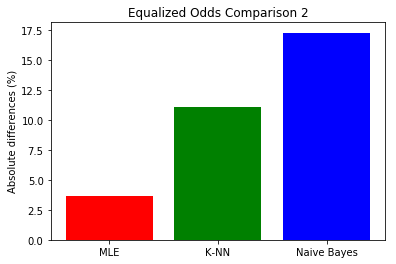

In [139]:
plt.title('Equalized Odds Comparison 2')
plot_diff([EO_mle_diff2, EO_knn_diff2, EO_nb_diff2])

# Predictive Parity

In [78]:
def find_PP_pr(classifier_df, label, race, pred):
    numerator = classifier_df.loc[(classifier_df[LABEL] == label) &\
                                 (classifier_df[RACE] == race) &\
                                 (classifier_df[PRED] == pred)].shape[0]
    denominator = classifier_df.loc[(classifier_df[RACE] == race) &\
                                   (classifier_df[PRED] == pred)].shape[0]
    return numerator / denominator

### MLE

In [143]:
# Note diff1 == diff3 as well as diff2 == diff4
PP_mle_diff1 = find_diff(find_PP_pr(mle_df, label=1, race=1, pred=1),\
                         find_PP_pr(mle_df, label=1, race=0, pred=1))

PP_mle_diff2 = find_diff(find_PP_pr(mle_df, label=1, race=1, pred=0),\
                         find_PP_pr(mle_df, label=1, race=0, pred=0))

PP_mle_diff3 = find_diff(find_PP_pr(mle_df, label=0, race=1, pred=1),\
                         find_PP_pr(mle_df, label=0, race=0, pred=1))

PP_mle_diff4 = find_diff(find_PP_pr(mle_df, label=0, race=1, pred=0),\
                         find_PP_pr(mle_df, label=0, race=0, pred=0))

In [144]:
(PP_mle_diff1, PP_mle_diff2, PP_mle_diff3, PP_mle_diff4)

(5.986881335718541, 5.646702450899921, 5.986881335718547, 5.646702450899921)

### K-Nearest Neighbors

In [145]:
PP_knn_diff1 = find_diff(find_PP_pr(knn_df, label=1, race=1, pred=1),\
                         find_PP_pr(knn_df, label=1, race=0, pred=1))

PP_knn_diff2 = find_diff(find_PP_pr(knn_df, label=1, race=1, pred=0),\
                         find_PP_pr(knn_df, label=1, race=0, pred=0))

In [146]:
PP_knn_diff1, PP_knn_diff2

(6.875043315545081, 1.9384762215135354)

### Naive Bayes

In [147]:
PP_nb_diff1 = find_diff(find_PP_pr(nb_df, label=1, race=1, pred=1),\
                         find_PP_pr(nb_df, label=1, race=0, pred=1))

PP_nb_diff2 = find_diff(find_PP_pr(nb_df, label=1, race=1, pred=0),\
                         find_PP_pr(nb_df, label=1, race=0, pred=0))

In [148]:
PP_nb_diff1, PP_nb_diff2

(1.1904761904761862, 1.7267760685165001)

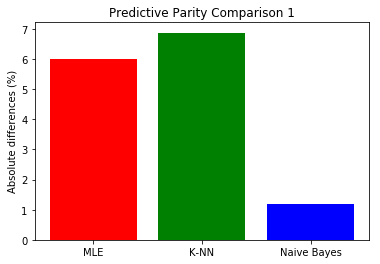

In [149]:
plt.title('Predictive Parity Comparison 1')
plot_diff([PP_mle_diff1, PP_knn_diff1, PP_nb_diff1])

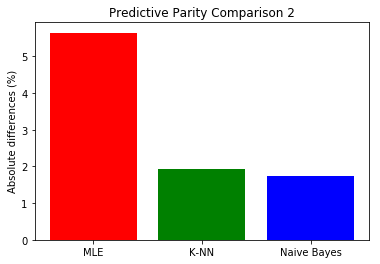

In [150]:
plt.title('Predictive Parity Comparison 2')
plot_diff([PP_mle_diff2, PP_knn_diff2, PP_nb_diff2])